#  2 Hands On: Data Quality and Pre-Processing

# **1. Assessing Data Quality**

**Load the following packages: dplyr, na.tools, tidyimpute (version from github
decisionpatterns/tidyimpute”)**

In [199]:
knitr::opts_chunk$set(echo = TRUE)

In [202]:
# Load the libraries
library(dplyr)
library(na.tools)
library(devtools)
library(dlookr)
library(corrplot)
library(tidyverse)
list.files(path = "../input")
#library(tidyimpute)

character(0)

**Load the carInsurance data set about the insurance risk rating of cars based on several characteristics of each car**

In [203]:
#Cargamos la data con coda una de sus caracteristicas 
load("Users/Ordenador/Downloads/carInsurance.Rdata")

In [204]:
datos <- carIns

**(a) Check if there are any missing values.**

In [205]:
# Chequeamos si hay valores faltantes utilizando el comando any_na()
any_na(datos)

[1] TRUE

**(b) Count the number of cases that have at least one missing value.**

In [206]:
#contamos el numero de casos en los que falten en las filas al menos un valor
missing_value <- carIns[!complete.cases(carIns), ] %>%
  count()
print(paste("Número de filas con al menos un valor faltante:", missing_value))

[1] "Número de filas con al menos un valor faltante: 46"


**(c) Create a new dataset by removing all the cases that have missing values.**

In [207]:
# creamos un nuevo dataset para remover los casos que tengan valores faltantes
# Crear un nuevo conjunto de datos sin valores faltantes
newDataset <- na.omit(datos)
newDataset

symb,normLoss,make,fuelType,aspiration,nDoors,bodyStyle,driveWheels,engineLocation,wheelBase,⋯,engineSize,fuelSystem,bore,stroke,compressionRatio,horsePower,peakRpm,cityMpg,highwayMpg,price
<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,⋯,<int>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
2,164,audi,gas,std,four,sedan,fwd,front,99.8,⋯,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
2,164,audi,gas,std,four,sedan,4wd,front,99.4,⋯,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
1,158,audi,gas,std,four,sedan,fwd,front,105.8,⋯,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,⋯,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875
2,192,bmw,gas,std,two,sedan,rwd,front,101.2,⋯,108,mpfi,3.50,2.80,8.80,101,5800,23,29,16430
0,192,bmw,gas,std,four,sedan,rwd,front,101.2,⋯,108,mpfi,3.50,2.80,8.80,101,5800,23,29,16925
0,188,bmw,gas,std,two,sedan,rwd,front,101.2,⋯,164,mpfi,3.31,3.19,9.00,121,4250,21,28,20970
0,188,bmw,gas,std,four,sedan,rwd,front,101.2,⋯,164,mpfi,3.31,3.19,9.00,121,4250,21,28,21105
2,121,chevrolet,gas,std,two,hatchback,fwd,front,88.4,⋯,61,2bbl,2.91,3.03,9.50,48,5100,47,53,5151


**(d) Create a new dataset by imputing all the missing values with 0.**

In [208]:
nuevaData <- datos %>%
  replace_na(replace = list(.default = 0))
nuevaData

symb,normLoss,make,fuelType,aspiration,nDoors,bodyStyle,driveWheels,engineLocation,wheelBase,⋯,engineSize,fuelSystem,bore,stroke,compressionRatio,horsePower,peakRpm,cityMpg,highwayMpg,price
<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,⋯,<int>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
3,NA,alfa-romero,gas,std,two,convertible,rwd,front,88.6,⋯,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
3,NA,alfa-romero,gas,std,two,convertible,rwd,front,88.6,⋯,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
1,NA,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,⋯,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
2,164,audi,gas,std,four,sedan,fwd,front,99.8,⋯,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
2,164,audi,gas,std,four,sedan,4wd,front,99.4,⋯,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
2,NA,audi,gas,std,two,sedan,fwd,front,99.8,⋯,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250
1,158,audi,gas,std,four,sedan,fwd,front,105.8,⋯,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
1,NA,audi,gas,std,four,wagon,fwd,front,105.8,⋯,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920
1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,⋯,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875


**(e) Create a new dataset by imputing the mean in all the columns which have double type values.**

In [209]:
# Create a new dataset with missing values imputed as the mean

carInsurance_imputed_media <- datos %>%
  mutate_if(is.double, ~ifelse(is.na(.), mean(., na_rm = TRUE), .))
carInsurance_imputed_media



symb,normLoss,make,fuelType,aspiration,nDoors,bodyStyle,driveWheels,engineLocation,wheelBase,⋯,engineSize,fuelSystem,bore,stroke,compressionRatio,horsePower,peakRpm,cityMpg,highwayMpg,price
<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,⋯,<int>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
3,NA,alfa-romero,gas,std,two,convertible,rwd,front,88.6,⋯,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
3,NA,alfa-romero,gas,std,two,convertible,rwd,front,88.6,⋯,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
1,NA,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,⋯,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
2,164,audi,gas,std,four,sedan,fwd,front,99.8,⋯,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
2,164,audi,gas,std,four,sedan,4wd,front,99.4,⋯,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
2,NA,audi,gas,std,two,sedan,fwd,front,99.8,⋯,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250
1,158,audi,gas,std,four,sedan,fwd,front,105.8,⋯,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
1,NA,audi,gas,std,four,wagon,fwd,front,105.8,⋯,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920
1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,⋯,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875


**(f) Create a new data set by imputing the mode in all the columns which have integer type values.**

In [210]:
library(modeest)
# Create a new dataset with mode imputation

carInsurance_imputed_moda <- datos %>%
  mutate_if(is.integer, ~ifelse(is.na(.), modeest::mfv(., na_rm = TRUE), .))
carInsurance_imputed_moda



symb,normLoss,make,fuelType,aspiration,nDoors,bodyStyle,driveWheels,engineLocation,wheelBase,⋯,engineSize,fuelSystem,bore,stroke,compressionRatio,horsePower,peakRpm,cityMpg,highwayMpg,price
<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,⋯,<int>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
3,161,alfa-romero,gas,std,two,convertible,rwd,front,88.6,⋯,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
3,161,alfa-romero,gas,std,two,convertible,rwd,front,88.6,⋯,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
1,161,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,⋯,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
2,164,audi,gas,std,four,sedan,fwd,front,99.8,⋯,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
2,164,audi,gas,std,four,sedan,4wd,front,99.4,⋯,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
2,161,audi,gas,std,two,sedan,fwd,front,99.8,⋯,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250
1,158,audi,gas,std,four,sedan,fwd,front,105.8,⋯,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
1,161,audi,gas,std,four,wagon,fwd,front,105.8,⋯,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920
1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,⋯,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875


**(g) Create a new data set by imputing the most frequent value to the column ”nDoors”**

In [211]:
# Convert the "nDoors" column to numeric
carInsurance_imputed_nDoors$nDoors <- as.numeric(carInsurance_imputed_nDoors$nDoors)
# Impute missing values in the "nDoors" column with the most frequent value
carInsurance_imputed_nDoors <-datos
carInsurance_imputed_nDoors$nDoors[is.na(carInsurance_imputed_nDoors$nDoors)] <- get_mode(carInsurance_imputed_nDoors$nDoors)


# Function to calculate mode
get_mode <- function(x) {
  freq <- table(x)
  mode_val <- as.numeric(names(freq))[freq == max(freq)]
  mode_val
}
     
carInsurance_imputed_nDoors

Warning message in get_mode(carInsurance_imputed_nDoors$nDoors):
"NAs introducidos por coerción"


symb,normLoss,make,fuelType,aspiration,nDoors,bodyStyle,driveWheels,engineLocation,wheelBase,⋯,engineSize,fuelSystem,bore,stroke,compressionRatio,horsePower,peakRpm,cityMpg,highwayMpg,price
<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,⋯,<int>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
3,NA,alfa-romero,gas,std,two,convertible,rwd,front,88.6,⋯,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
3,NA,alfa-romero,gas,std,two,convertible,rwd,front,88.6,⋯,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
1,NA,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,⋯,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
2,164,audi,gas,std,four,sedan,fwd,front,99.8,⋯,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
2,164,audi,gas,std,four,sedan,4wd,front,99.4,⋯,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
2,NA,audi,gas,std,two,sedan,fwd,front,99.8,⋯,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250
1,158,audi,gas,std,four,sedan,fwd,front,105.8,⋯,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
1,NA,audi,gas,std,four,wagon,fwd,front,105.8,⋯,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920
1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,⋯,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875


**(h) Combine the three last imputations to obtain a final dataset. Are there any duplicated cases?**

In [212]:
# Combinar las tres imputaciones
 conjunto_final <- bind_rows(carInsurance_imputed_media, carInsurance_imputed_moda, carInsurance_imputed_nDoors)
conjunto_final
 # Verificar casos duplicados, distinc para eliminar las filas duplicadas
 casos_duplicados <- conjunto_final %>% distinct() %>% count() %>% filter(n > 1)
print(paste("Los casos duplicdos son en total:",casos_duplicados))

symb,normLoss,make,fuelType,aspiration,nDoors,bodyStyle,driveWheels,engineLocation,wheelBase,⋯,engineSize,fuelSystem,bore,stroke,compressionRatio,horsePower,peakRpm,cityMpg,highwayMpg,price
<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,⋯,<int>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
3,NA,alfa-romero,gas,std,two,convertible,rwd,front,88.6,⋯,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
3,NA,alfa-romero,gas,std,two,convertible,rwd,front,88.6,⋯,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
1,NA,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,⋯,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
2,164,audi,gas,std,four,sedan,fwd,front,99.8,⋯,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
2,164,audi,gas,std,four,sedan,4wd,front,99.4,⋯,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
2,NA,audi,gas,std,two,sedan,fwd,front,99.8,⋯,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250
1,158,audi,gas,std,four,sedan,fwd,front,105.8,⋯,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
1,NA,audi,gas,std,four,wagon,fwd,front,105.8,⋯,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920
1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,⋯,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875


[1] "Los casos duplicdos son en total: 246"


# **2. Data Pre-Processing**

**2. Load the package dlookr. Use the same car insurance data set above and apply the following
transformations to the price attribute. Be critical regarding the obtained results.**

En este caso el package ya esta cargado en la parte de arriba

**(a) Apply range-based normalization and z-score normalization.**


In [213]:
# Aplicar normalización basada en el rango
 
# Calcular los valores mínimo y máximo de la columna "price"
min_price <- min(datos$price, na.rm = TRUE)
max_price <- max(datos$price, na.rm = TRUE)

# Aplicar la normalización basada en el rango a la columna "price"
datos$price_range <- datos %>% mutate(price_range=(datos$price - min_price) / (max_price - min_price))

datos$price_range


symb,normLoss,make,fuelType,aspiration,nDoors,bodyStyle,driveWheels,engineLocation,wheelBase,⋯,fuelSystem,bore,stroke,compressionRatio,horsePower,peakRpm,cityMpg,highwayMpg,price,price_range
<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,⋯,<fct>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>
3,NA,alfa-romero,gas,std,two,convertible,rwd,front,88.6,⋯,mpfi,3.47,2.68,9.00,111,5000,21,27,13495,0.2079588898
3,NA,alfa-romero,gas,std,two,convertible,rwd,front,88.6,⋯,mpfi,3.47,2.68,9.00,111,5000,21,27,16500,0.2825579663
1,NA,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,⋯,mpfi,2.68,3.47,9.00,154,5000,19,26,16500,0.2825579663
2,164,audi,gas,std,four,sedan,fwd,front,99.8,⋯,mpfi,3.19,3.40,10.00,102,5500,24,30,13950,0.2192542575
2,164,audi,gas,std,four,sedan,4wd,front,99.4,⋯,mpfi,3.19,3.40,8.00,115,5500,18,22,17450,0.3061417010
2,NA,audi,gas,std,two,sedan,fwd,front,99.8,⋯,mpfi,3.19,3.40,8.50,110,5500,19,25,15250,0.2515267365
1,158,audi,gas,std,four,sedan,fwd,front,105.8,⋯,mpfi,3.19,3.40,8.50,110,5500,19,25,17710,0.3125961968
1,NA,audi,gas,std,four,wagon,fwd,front,105.8,⋯,mpfi,3.19,3.40,8.50,110,5500,19,25,18920,0.3426344273
1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,⋯,mpfi,3.13,3.40,8.30,140,5500,17,20,23875,0.4656422223


In [236]:
#Normalizacion basado en z-score
datos$price_zscore <- scale(datos$price, TRUE)
datos$price_zscore

0.03622351
0.41435047
0.41435047
0.09347734
0.53389143
0.25705972
0.56660791
0.71886535
1.34236587
NA
0.40554218


**(b) Discretize it into 4 equal-frequency ranges an into 4 equal-width ranges**

In [238]:
 # Discretize into 4 equal-frequency ranges
equal_freq <- cut(carIns$price, breaks = 4, labels = FALSE, include.lowest = TRUE, dig.lab = 4)
print(equal_freq)
# Discretize into 4 equal-width ranges
equal_width <- cut(carIns$price, breaks = 4, labels = FALSE, include.lowest = TRUE)
print(equal_width)


  [1]  1  2  2  1  2  2  2  2  2 NA  2  2  2  2  2  3  4  4  1  1  1  1  1  1  1
 [26]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 NA NA  1  3  4  4
 [51]  1  1  1  1  1  1  1  1  2  1  1  1  1  1  1  2  2  3  3  3  3  3  3  4  4
 [76]  2  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
[101]  1  1  1  1  2  2  2  1  1  1  1  2  2  2  2  2  2  2  1  1  1  1  1  1  1
[126]  2  3  3  4 NA  1  1  1  1  1  2  2  2  1  1  1  1  1  1  1  1  1  1  1  1
[151]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  1  1
[176]  1  1  1  2  2  2  2  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  2  2  2
[201]  2  2  2  2  2
  [1]  1  2  2  1  2  2  2  2  2 NA  2  2  2  2  2  3  4  4  1  1  1  1  1  1  1
 [26]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 NA NA  1  3  4  4
 [51]  1  1  1  1  1  1  1  1  2  1  1  1  1  1  1  2  2  3  3  3  3  3  3  4  4
 [76]  2  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
[101]  

**3. With the seed 111019 obtain the following samples on the car insurance data set.**

In [217]:
set.seed(111019)

**(a) A random sample of 60% of the cases, with replacement**

In [218]:
#A random sample 60% of the cases with replacement
sample_60 <- sample_frac(carIns, 0.6, replace = TRUE)
sample_60

symb,normLoss,make,fuelType,aspiration,nDoors,bodyStyle,driveWheels,engineLocation,wheelBase,⋯,engineSize,fuelSystem,bore,stroke,compressionRatio,horsePower,peakRpm,cityMpg,highwayMpg,price
<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,⋯,<int>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,128,nissan,diesel,std,two,sedan,fwd,front,94.5,⋯,103,idi,2.99,3.47,21.90,55,4800,45,50,7099
1,101,honda,gas,std,two,hatchback,fwd,front,93.7,⋯,92,1bbl,2.91,3.41,9.20,76,6000,30,34,6529
0,161,peugot,gas,std,four,sedan,rwd,front,107.9,⋯,120,mpfi,3.46,3.19,8.40,97,5000,19,24,16630
2,NA,audi,gas,std,two,sedan,fwd,front,99.8,⋯,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250
0,102,subaru,gas,std,four,sedan,4wd,front,97.0,⋯,108,2bbl,3.62,2.64,9.00,82,4800,24,25,9233
3,NA,volkswagen,gas,std,two,convertible,fwd,front,94.5,⋯,109,mpfi,3.19,3.40,8.50,90,5500,24,29,11595
-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,⋯,141,mpfi,3.78,3.15,9.50,114,5400,24,28,15985
2,137,honda,gas,std,two,hatchback,fwd,front,86.6,⋯,92,1bbl,2.91,3.41,9.60,58,4800,49,54,6479
1,148,dodge,gas,std,four,sedan,fwd,front,93.7,⋯,90,2bbl,2.97,3.23,9.40,68,5500,31,38,6692


**(b) A stratified sample of 60% of the cases of cars, according to the fuelType attribute.**

In [219]:
 fraction <- 0.6
 
 # Obtener la muestra estratificada
 muestra_estratificada <- datos %>% 
   group_by(fuelType) %>% 
   slice_sample(prop = fraction, replace = FALSE)
 
 # Verificar el tamaño de la muestra
 nrow(muestra_estratificada)

[1] 123

**(c) Use the table() function to inspect the distribution of values in each of the two samples above**

In [220]:
# Inspeccionar la distribución de valores en la muestra aleatoria simple
 table(sample_60$fuelType)
 
 # Inspeccionar la distribución de valores en la muestra estratificada
 table(muestra_estratificada$fuelType)


diesel    gas 
     8    115 


diesel    gas 
    12    111 

**4. Load the package corrplot and select the numeric attributes of the car insurance data set.**

Ya se cargo el package crrplot anteriormente al inicio.

In [221]:
 # Seleccionar atributos numéricos
 atributos_numericos <- select_if(datos, is.numeric)
atributos_numericos

symb,normLoss,wheelBase,length,width,height,curbWeight,engineSize,bore,stroke,compressionRatio,horsePower,peakRpm,cityMpg,highwayMpg,price,price_zscore
<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,"<dbl[,1]>"
3,NA,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.00,111,5000,21,27,13495,0.03622351
3,NA,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.00,111,5000,21,27,16500,0.41435047
1,NA,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.00,154,5000,19,26,16500,0.41435047
2,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.00,102,5500,24,30,13950,0.09347734
2,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.00,115,5500,18,22,17450,0.53389143
2,NA,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.50,110,5500,19,25,15250,0.25705972
1,158,105.8,192.7,71.4,55.7,2844,136,3.19,3.40,8.50,110,5500,19,25,17710,0.56660791
1,NA,105.8,192.7,71.4,55.7,2954,136,3.19,3.40,8.50,110,5500,19,25,18920,0.71886535
1,158,105.8,192.7,71.4,55.9,3086,131,3.13,3.40,8.30,140,5500,17,20,23875,1.34236587


**(a) Using the function cor(), obtain the pearson correlation coefficient between each pair of variables.**

In [222]:
# Calcular el coeficiente de correlación de Pearson
 matriz_correlacion <- cor(atributos_numericos)
 
 # Imprimir la matriz de correlación
 print(matriz_correlacion)
 

                        symb normLoss  wheelBase     length      width
symb              1.00000000       NA -0.5319537 -0.3576115 -0.2329191
normLoss                  NA        1         NA         NA         NA
wheelBase        -0.53195368       NA  1.0000000  0.8745875  0.7951436
length           -0.35761152       NA  0.8745875  1.0000000  0.8411183
width            -0.23291906       NA  0.7951436  0.8411183  1.0000000
height           -0.54103820       NA  0.5894348  0.4910295  0.2792103
curbWeight       -0.22769059       NA  0.7763863  0.8777285  0.8670325
engineSize       -0.10578971       NA  0.5693287  0.6833599  0.7354334
bore                      NA       NA         NA         NA         NA
stroke                    NA       NA         NA         NA         NA
compressionRatio -0.17851508       NA  0.2497858  0.1584137  0.1811286
horsePower                NA       NA         NA         NA         NA
peakRpm                   NA       NA         NA         NA         NA
cityMp

**(b) Apply the function cor.mtest() to the previous result to calculate the p-values and confidence
intervals of the correlation coefficient for each pair of variables**

In [223]:
# Calcular los valores p y los intervalos de confianza
 cor_test <- cor.mtest(atributos_numericos)
# Imprimir los resultados
 print(cor_test)

$p
                         symb     normLoss    wheelBase       length
symb             0.000000e+00 3.432929e-13 2.255894e-16 1.409339e-07
normLoss         3.432929e-13 0.000000e+00 3.439849e-01 7.679017e-01
wheelBase        2.255894e-16 3.439849e-01 0.000000e+00 9.699227e-66
length           1.409339e-07 7.679017e-01 9.699227e-66 0.000000e+00
width            7.770414e-04 1.805700e-01 5.612752e-46 4.332386e-56
height           5.531350e-17 7.428895e-09 1.437985e-20 7.731666e-14
curbWeight       1.025874e-03 1.262266e-01 1.439877e-42 8.728146e-67
engineSize       1.311313e-01 3.218897e-02 5.233096e-19 1.496334e-29
bore             5.750916e-02 6.497992e-01 1.475771e-13 1.162914e-21
stroke           8.994914e-01 4.096535e-01 2.201552e-02 6.640708e-02
compressionRatio 1.043948e-02 9.039883e-02 3.039092e-04 2.329180e-02
horsePower       3.098897e-01 1.204793e-04 2.540628e-07 8.505849e-18
peakRpm          7.359080e-05 6.174988e-04 1.209679e-07 3.232254e-05
cityMpg          6.101009e-01 8

**(c) Plot the all correlation information using the function corrplot. Explore some of its parameters.**

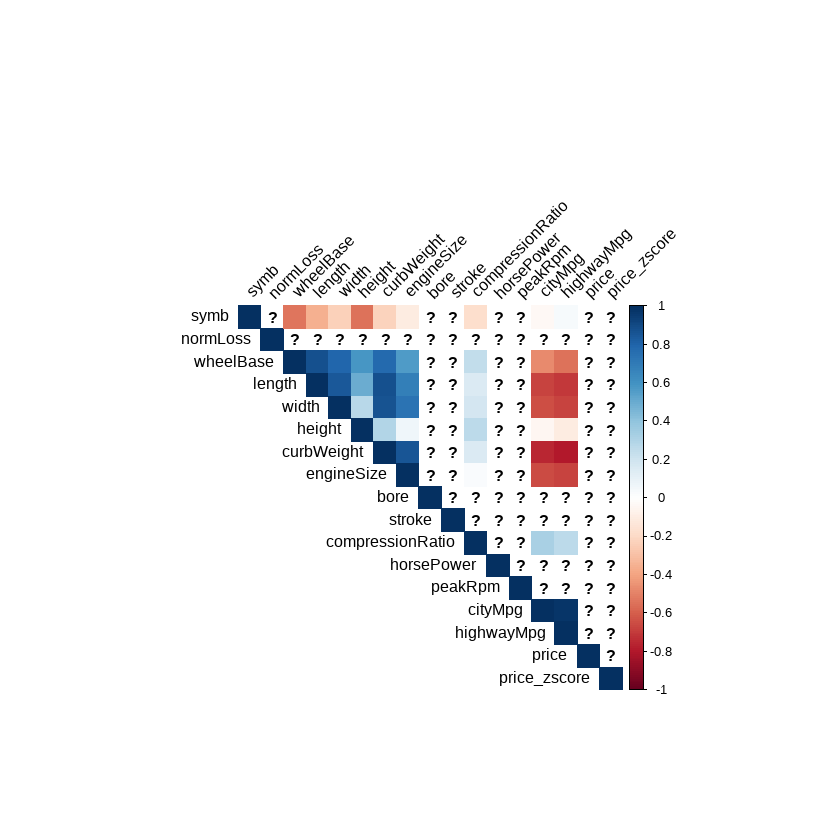

In [224]:
# Graficar la matriz de correlación
 corrplot(matriz_correlacion, method = "color", type = "upper", tl.col = "black", tl.srt = 45)

**5. Load the data set USJudgeRatings, from the datasets package, containing lawyers’ ratings of state
judges in the US Superior Court regarding a set of attributes.**

In [225]:
# Load the datasets package
library(datasets)

# Load the USJudgeRatings dataset
data(USJudgeRatings)

# View the dataset
View(USJudgeRatings)


,CONT,INTG,DMNR,DILG,CFMG,DECI,PREP,FAMI,ORAL,WRIT,PHYS,RTEN
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
"AARONSON,L.H.",5.7,7.9,7.7,7.3,7.1,7.4,7.1,7.1,7.1,7.0,8.3,7.8
"ALEXANDER,J.M.",6.8,8.9,8.8,8.5,7.8,8.1,8.0,8.0,7.8,7.9,8.5,8.7
"ARMENTANO,A.J.",7.2,8.1,7.8,7.8,7.5,7.6,7.5,7.5,7.3,7.4,7.9,7.8
"BERDON,R.I.",6.8,8.8,8.5,8.8,8.3,8.5,8.7,8.7,8.4,8.5,8.8,8.7
"BRACKEN,J.J.",7.3,6.4,4.3,6.5,6.0,6.2,5.7,5.7,5.1,5.3,5.5,4.8
"BURNS,E.B.",6.2,8.8,8.7,8.5,7.9,8.0,8.1,8.0,8.0,8.0,8.6,8.6
"CALLAHAN,R.J.",10.6,9.0,8.9,8.7,8.5,8.5,8.5,8.5,8.6,8.4,9.1,9.0
"COHEN,S.S.",7.0,5.9,4.9,5.1,5.4,5.9,4.8,5.1,4.7,4.9,6.8,5.0
"DALY,J.J.",7.3,8.9,8.9,8.7,8.6,8.5,8.4,8.4,8.4,8.5,8.8,8.8


**(a) Apply the function prcomp() to obtain the principal components. Inspect how each variable is
obtained by the linear combination of each component.**


In [226]:
# Apply prcomp() to obtain the principal components
pca <- prcomp(USJudgeRatings, scale. = TRUE)

# Inspect the variable loadings of each component
loadings <- pca$rotation

# Print the variable loadings
print(loadings)


              PC1          PC2          PC3          PC4          PC5
CONT  0.003075143  0.932890644 -0.334756548  0.058576867  0.093438368
INTG -0.288550775 -0.182040993 -0.549360126  0.173977074 -0.014543880
DMNR -0.286884206 -0.197565743 -0.556490386 -0.124412022 -0.228832817
DILG -0.304354091  0.036304667  0.163629910  0.321395544 -0.301936920
CFMG -0.302572733  0.168393523  0.207341904  0.012949223 -0.448430522
DECI -0.301891969  0.127877299  0.297902771  0.030491779 -0.424003128
PREP -0.309406446  0.032230248  0.151869345  0.213656069  0.202853400
FAMI -0.306679527 -0.001315183  0.195290454  0.200651140  0.507470003
ORAL -0.312708348 -0.003625720  0.002150634 -0.007441042  0.246059421
WRIT -0.311061231 -0.031378756  0.056045596  0.137104995  0.305562842
PHYS -0.280723624  0.089037698  0.154000444 -0.841266046  0.118424976
RTEN -0.309790218 -0.039381306 -0.172869757 -0.184223629  0.006717911
              PC6          PC7           PC8         PC9        PC10
CONT -0.004064432 -0.

**(b) Load the package ggbiplot and plot the two first components with the function ggbiplot(). You can
label each point with the lawyer’s name by setting the labels parameter.**

No se pudo cargar el package ggbiplot en jupyter pero se instalo otro paquete y libreria que hace lo mismo que es el factoextra.

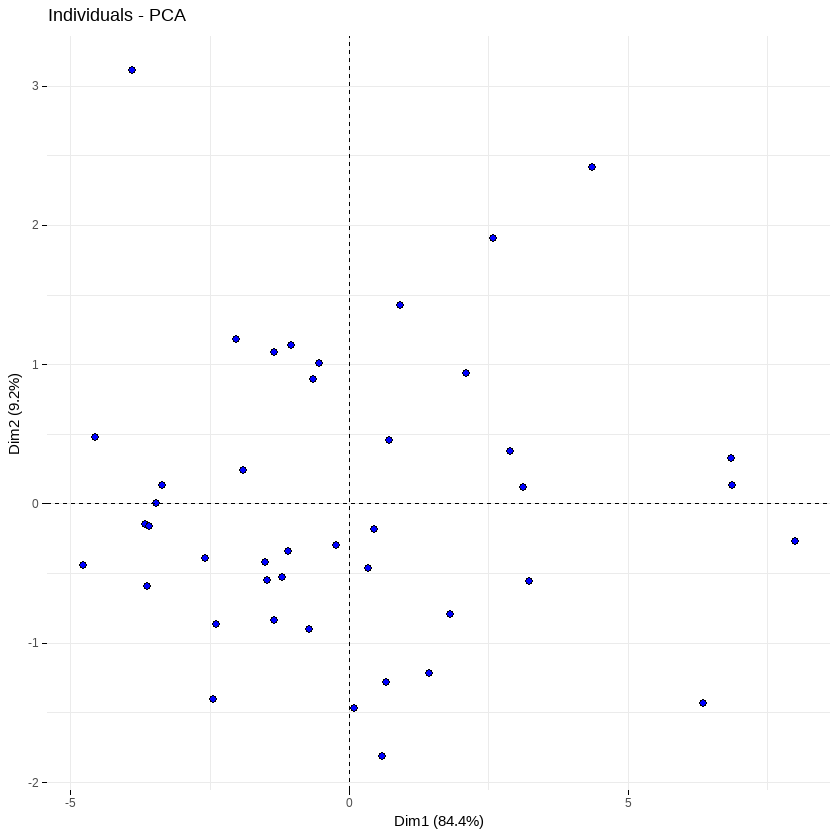

In [227]:
# Load the factoextra package
library(factoextra)

# Plot the first two principal components with labels
fviz_pca_ind(pca, geom.ind = "point", pointshape = 21, pointsize = 2,
             fill.ind = "blue", col.ind = "black",
             label = "var", repel = TRUE)

